# Imports

In [2]:
import pandas as pd
import numpy as np

# Preprocessing

In [3]:
# Read dataset
df = pd.read_csv("BankChurners.csv")
# print(df.columns)

# Keep only selected columns (drop first and last two columns)
df = df[['Attrition_Flag', 'Customer_Age', 'Gender',
        'Dependent_count', 'Education_Level', 'Marital_Status',
        'Income_Category', 'Card_Category', 'Months_on_book',
        'Total_Relationship_Count', 'Months_Inactive_12_mon',
        'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
        'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
        'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]

df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# Feature Engineering

In [4]:
# Determine numerical columns
numerical_cols = list(df.describe().columns)

# Determine categorical columns
categorical_cols = [i for i in df.columns if i not in numerical_cols]

print(f"Numerical Columns:\n{numerical_cols}\n")
print(f"Categorical Columns:\n{categorical_cols}")

Numerical Columns:
['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

Categorical Columns:
['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


## Transforming and Scaling of Numerical Columns

### Transformation (to deal with skewness)

In [5]:
# Retrieve name of skewed columns
skewed = []
for skew_val in df[numerical_cols].skew():
    if skew_val > 1 or skew_val < -1:
        skewed.append( df[numerical_cols].skew()[ df[numerical_cols].skew() == skew_val ].index[0] )
        print( df[numerical_cols].skew()[ df[numerical_cols].skew() == skew_val ].index[0])
        print(round(skew_val, 3) )

Credit_Limit
1.667
Avg_Open_To_Buy
1.662
Total_Amt_Chng_Q4_Q1
1.732
Total_Trans_Amt
2.041
Total_Ct_Chng_Q4_Q1
2.064


In [6]:
# Transform skewed columns
for skewed_col in ['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Trans_Amt']:
    df[skewed_col] = np.log(df[skewed_col])

### Scaling

In [7]:
# from sklearn.preprocessing import MinMaxScaler

# features_scaled = features_onehotencoded

# # Scale
# features_scaled[features_scaled.columns] = MinMaxScaler().fit_transform(features_onehotencoded[features_onehotencoded.columns])
# features_scaled

# # features_scaled = MinMaxScaler().fit_transform(features_onehotencoded)
# # features_scaled

In [8]:
# Visualizing before and after scaling of features



## One-hot Encoding Categorical Columns

### Visualizing Categorical Columns

In [9]:
import matplotlib as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure and subplots
fig = go.Figure()
fig = make_subplots(rows=(len(categorical_cols) // 2) + 1, cols=2)

# Plot
row_ = 1
col_ = 1
max_ = 2
for column in categorical_cols:
    # print(column)
    N = df[column].value_counts().index
    y_val =  df[column].value_counts().values
    fig.add_trace(go.Bar(x = N, y = y_val, name = f'{column}'), row = row_, col = col_)
    if col_ == max_:
        row_ += 1
        col_ = 1
    else:
        col_ += 1

fig.update_layout(
    autosize=True,
    width=900,
    height=900
)

fig.show()

### Encoding Categorical Features

In [10]:
# Remove our target variable to work with it seperately
categorical_cols.remove('Attrition_Flag')

# drop_first: features that only require one column during one hot encoding will use only one. 
# Rationale: to reduce dimensions further and prevent collinearity between 2 parameters
features_onehotencoded = pd.get_dummies(df[categorical_cols], drop_first=True)

# Combine numerical columns back
features_onehotencoded = pd.concat([features_onehotencoded, df[numerical_cols]], axis = 1)

# Comparison of what columns changed:
print("Number of categorical columns before encoding:", len(categorical_cols))
print("Number of categorical columns after encoding:", len(features_onehotencoded.columns))
print("\nAll features before encoding:\n" + str(list(df.columns)[1:])) # Don't display target variable
print("\nAll features after encoding:\n" + str(list(features_onehotencoded.columns)))
features_onehotencoded

Number of categorical columns before encoding: 5
Number of categorical columns after encoding: 32

All features before encoding:
['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

All features after encoding:
['Gender_M', 'Education_Level_Doctorate', 'Education_Level_Graduate', 'Education_Level_High School', 'Education_Level_Post-Graduate', 'Education_Level_Uneducated', 'Education_Level_Unknown', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Unknown', 'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K', 'Income_Category_Less than $40K', 'Income_Category_Unknown', 'Card_Category_Gold', 'Card_Categor

,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,0,0,1,0,0,0,1,0,0,...,1,3,9.448648,777,9.385469,1.335,7.042286,42,1.625,0.061
1,0,0,1,0,0,0,0,0,1,0,...,1,2,9.018695,864,8.908154,1.541,7.163172,33,3.714,0.105
2,1,0,1,0,0,0,0,1,0,0,...,1,0,8.136811,0,8.136811,2.594,7.542744,20,2.333,0.000
3,0,0,0,1,0,0,0,0,0,1,...,4,1,8.105609,2517,6.679599,1.405,7.065613,20,2.333,0.760
4,1,0,0,0,0,1,0,1,0,0,...,1,0,8.458716,0,8.458716,2.175,6.704414,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,0,1,0,0,0,0,0,1,0,...,2,3,8.294799,1851,7.674153,0.703,9.647046,117,0.857,0.462
10123,1,0,0,0,0,0,1,0,0,0,...,2,3,8.361007,2186,7.645398,0.804,9.078408,69,0.683,0.511
10124,0,0,0,1,0,0,0,1,0,0,...,3,4,8.595820,0,8.595820,0.819,9.239025,60,0.818,0.000
10125,1,0,1,0,0,0,0,0,0,1,...,3,3,8.571871,0,8.571871,0.535,9.035392,62,0.722,0.000


### Encoding Target Variable

In [11]:
target_onehotencoded = pd.get_dummies(df['Attrition_Flag'], drop_first=True)
target_onehotencoded

,Existing Customer
0,1
1,1
2,1
3,1
4,1
...,...
10122,1
10123,0
10124,0
10125,0


### Scaling

<AxesSubplot:>

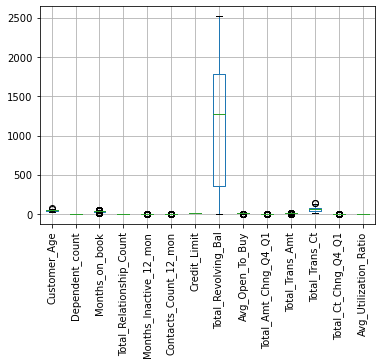

In [12]:
# Visualizing features before scaling
features_onehotencoded[numerical_cols].boxplot(rot=90)

In [13]:
from sklearn.preprocessing import MinMaxScaler

features_scaled = features_onehotencoded

# Scale
features_scaled[features_scaled.columns] = MinMaxScaler().fit_transform(features_scaled[features_scaled.columns])
# features_scaled

<AxesSubplot:>

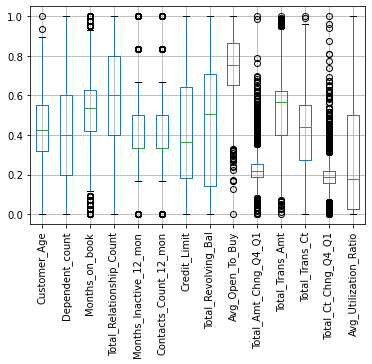

In [14]:
# Visualizing features after scaling
features_scaled[numerical_cols].boxplot(rot=90)

# Creating Train, Validation and Test sets

In [15]:
x = features_onehotencoded
y = target_onehotencoded.values.ravel() # To change column vector into 1D array

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.20, random_state=2021)

# Create LogisticRegression Model

In [16]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=2021)

clf.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(random_state=2021)

In [17]:
# Predict
predictions = clf.predict(X_val)

In [18]:
# Evaluate
from sklearn.metrics import classification_report

print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.86      0.55      0.67       341
           1       0.92      0.98      0.95      1685

    accuracy                           0.91      2026
   macro avg       0.89      0.77      0.81      2026
weighted avg       0.91      0.91      0.90      2026



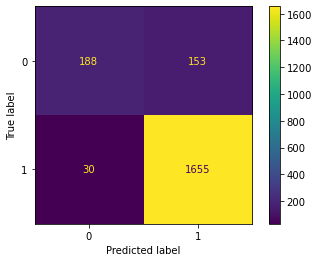

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_val, predictions)

# Create DecisionTree Model

In [20]:
from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier(random_state=2021)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2021)

In [21]:
predictions2 = clf2.predict(X_val)

print(classification_report(y_val, predictions2))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       341
           1       0.96      0.96      0.96      1685

    accuracy                           0.94      2026
   macro avg       0.89      0.89      0.89      2026
weighted avg       0.94      0.94      0.94      2026



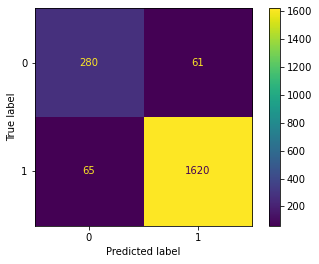

In [22]:
ConfusionMatrixDisplay.from_predictions(y_val, predictions2)

# Create Support Vector Machine Model

In [23]:
from sklearn.svm import SVC

clf3 = SVC(random_state=2021)
clf3.fit(X_train, y_train)

SVC(random_state=2021)

In [24]:
predictions3 = clf3.predict(X_val)

print(classification_report(y_val, predictions3))

              precision    recall  f1-score   support

           0       0.87      0.50      0.64       341
           1       0.91      0.98      0.94      1685

    accuracy                           0.90      2026
   macro avg       0.89      0.74      0.79      2026
weighted avg       0.90      0.90      0.89      2026



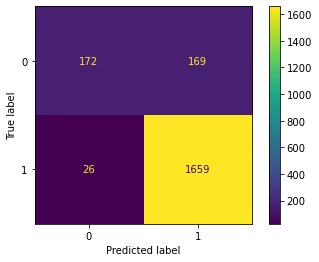

In [25]:
ConfusionMatrixDisplay.from_predictions(y_val, predictions3)

# Create Random Forest Model

In [26]:
from sklearn.ensemble import RandomForestClassifier

clf4 = RandomForestClassifier(random_state=2021)
clf4.fit(X_train, y_train)

RandomForestClassifier(random_state=2021)

In [27]:
predictions4 = clf4.predict(X_val)

print(classification_report(y_val, predictions4))

              precision    recall  f1-score   support

           0       0.93      0.79      0.86       341
           1       0.96      0.99      0.97      1685

    accuracy                           0.96      2026
   macro avg       0.95      0.89      0.92      2026
weighted avg       0.96      0.96      0.95      2026



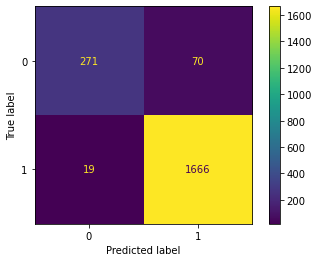

In [28]:
ConfusionMatrixDisplay.from_predictions(y_val, predictions4)

# Create XGBoost Model

In [32]:
from xgboost import XGBClassifier

clf5 = XGBClassifier(learning_rate=0.1,
                    n_estimators=1000,
                    use_label_encoder=False,
                    random_state=2021)

clf5.fit(X_train, y_train, eval_metric='logloss')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=8, num_parallel_tree=1,
              random_state=2021, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [33]:
predictions5 = clf5.predict(X_val)

print(classification_report(y_val, predictions5))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       341
           1       0.98      0.99      0.98      1685

    accuracy                           0.97      2026
   macro avg       0.95      0.94      0.95      2026
weighted avg       0.97      0.97      0.97      2026



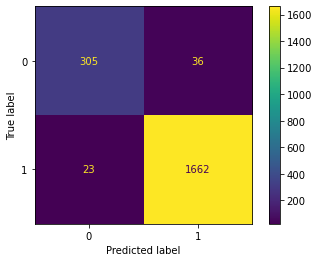

In [34]:
ConfusionMatrixDisplay.from_predictions(y_val, predictions5)

# Create Naive Bayes Model

In [46]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB
clf6 = BernoulliNB() #GaussianNB()

clf6.fit(X_train, y_train)

BernoulliNB()

In [47]:
predictions6 = clf6.predict(X_val)

print(classification_report(y_val, predictions6))

              precision    recall  f1-score   support

           0       0.37      0.52      0.43       341
           1       0.89      0.82      0.86      1685

    accuracy                           0.77      2026
   macro avg       0.63      0.67      0.64      2026
weighted avg       0.81      0.77      0.78      2026



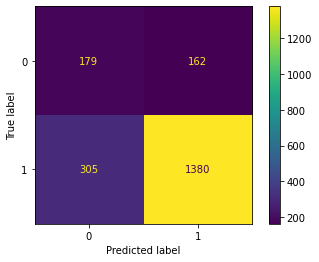

In [48]:
ConfusionMatrixDisplay.from_predictions(y_val, predictions6)